#### 相平面，流速场

In [1]:
import os
import sys
sys.path.append(r"../../")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit, prange
import random
from nodes.HH import *
from nodes.Iz import *
from nodes.FHN import *
from nodes.ML import *
from nodes.HR import *

In [2]:
dt = 0.01
method = 'euler'    # （"euler", "rk4"）
N = 1

In [3]:
nodes = HH(N, method, dt)
nodes.params_nodes["Iex"] = 10.

# nodes = Iz(N, method, dt)
# nodes.params_nodes["Iex"] = 10.

In [4]:
for i in range(100_00):
    nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

In [5]:
# ( -80., 30., -8., 0.)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-80., 30., 0., 1.), N=500)

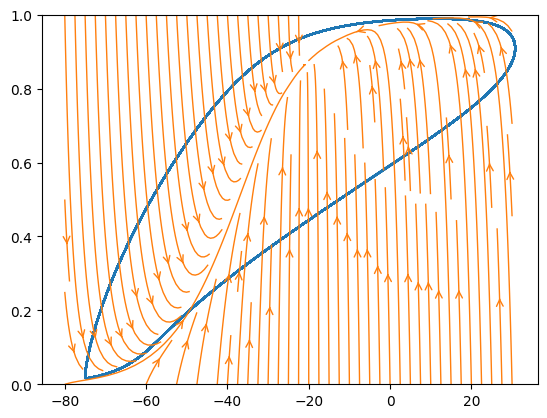

In [6]:
plt.plot(mem, m)
plt.streamplot(X, Y, dX_dt, dY_dt, density=1.5, linewidth=1., arrowsize=1.2, arrowstyle='->')
# plt.ylim(-16., 0.)
# plt.xlim(-80., -45.)
plt.show()

In [7]:
nodes = FHN(N, method, dt)
nodes.params_nodes["Iex"] = 1.

In [8]:
for i in range(100_00):
    nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

In [9]:
# dX_dt, dY_dt, X, Y = nodes.cal_flow_field(select_dim=(0, 1), vars_lim=(-80., 30., 0., 1.), N=500)

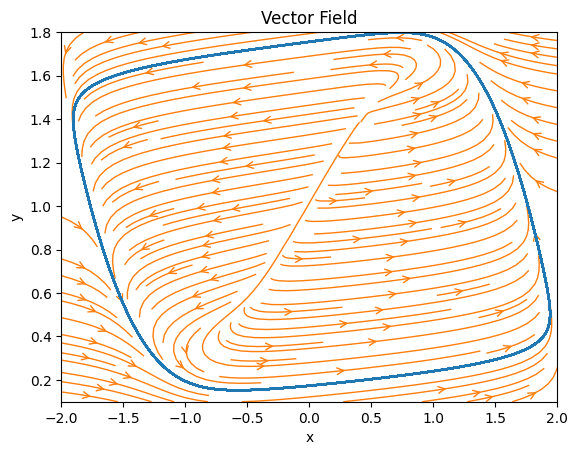

In [10]:
plt.plot(mem, m)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-2., 2., 0.1, 1.8), N=500, plt_flag=True)
# plt.streamplot(X, Y, dX_dt, dY_dt, density=1.5, linewidth=1., arrowsize=1.2, arrowstyle='->')
plt.show()

In [11]:
nodes = ML(N, method, dt)
nodes.params_nodes["Iex"] = 100.

In [12]:
for i in range(100_00):
    nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

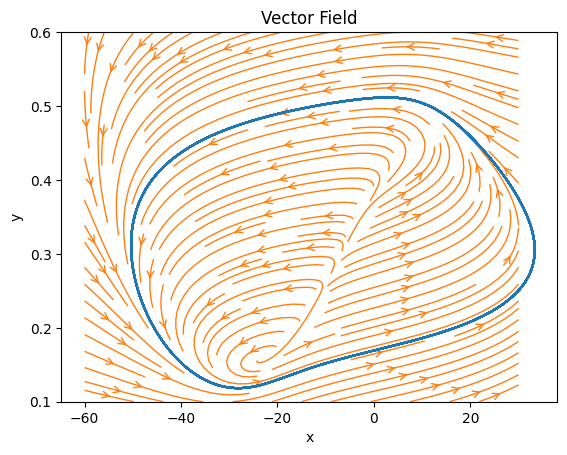

In [13]:
plt.plot(mem, m)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-60., 30., 0.1, 0.6), N=500, plt_flag=True)
plt.show()

In [14]:
nodes = HR(N, method, dt)
nodes.params_nodes["Iex"] = 1.6

In [15]:
for i in range(500_00):
    nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

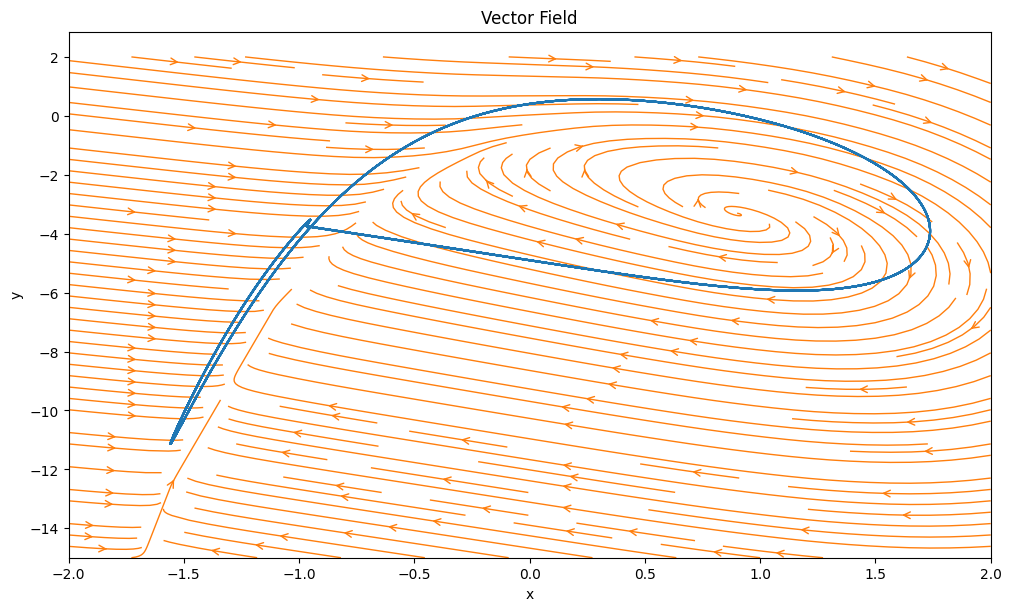

In [16]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
ax = fig.add_subplot()
ax.plot(mem, m)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-2., 2., -15., 2.), N=10, plt_flag=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
# plt.tight_layout()
plt.show()